In [1]:
# http://www.physics.usyd.edu.au/teach_res/mp/mscripts/
# ns_izh002.m
import collections
from collections import OrderedDict

# Fast spiking cannot be reproduced as it requires modifications to the standard Izhi equation,
# which are expressed in this mod file.
# https://github.com/OpenSourceBrain/IzhikevichModel/blob/master/NEURON/izhi2007b.mod


reduced2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6))])


type2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('RTN',       (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('RTN_burst', (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('CH',        (50,  1.5,  -60, -40, 25, 0.03,   1, -40,  150,   3)),
  ('FS',        (20,  1.0,  -55, -40, 25, 0.2,   -2, -45,  -55,   5))])

import numpy as np
reduced_dict = OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d']])

#OrderedDict
for i,k in enumerate(reduced_dict.keys()):
    for v in type2007.values():
        reduced_dict[k].append(v[i])

explore_param = {k:(np.min(v),np.max(v)) for k,v in reduced_dict.items()}
param_ranges = OrderedDict(explore_param)


#IB = mparams[param_dict['IB']]
RS = {}
IB = {}
TC = {}
CH = {}
RTN_burst = {}
cells = OrderedDict([(k,[]) for k in ['RS','IB','CH','LTS','FS','TC','TC_burst','RTN','RTN_busrt']])
reduced_cells = OrderedDict([(k,[]) for k in ['RS','IB','LTS','TC','TC_burst']])

for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in reduced_dict.items():
        reduced_cells[key][k] = v[index]

print(reduced_cells)
cells = reduced_cells

OrderedDict([('RS', {'vPeak': 35, 'd': 100, 'vr': -60, 'b': -2, 'k': 0.7, 'C': 100, 'c': -50, 'vt': -40, 'a': 0.03}), ('IB', {'vPeak': 50, 'd': 130, 'vr': -75, 'b': 5, 'k': 1.2, 'C': 150, 'c': -56, 'vt': -45, 'a': 0.01}), ('LTS', {'vPeak': 40, 'd': 20, 'vr': -56, 'b': 8, 'k': 1.0, 'C': 100, 'c': -53, 'vt': -42, 'a': 0.03}), ('TC', {'vPeak': 35, 'd': 10, 'vr': -60, 'b': 15, 'k': 1.6, 'C': 200, 'c': -60, 'vt': -50, 'a': 0.01}), ('TC_burst', {'vPeak': 35, 'd': 10, 'vr': -60, 'b': 15, 'k': 1.6, 'C': 200, 'c': -60, 'vt': -50, 'a': 0.01})])


In [2]:
model = None
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization import get_neab

from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('NEURON'))
print(cells['TC'])
model.set_attrs(cells['TC'])
#dir(model._backend)
dir(model._backend.h)
#loc = 
#for sec in 
dir(model._backend.h.m_RS_RS_pop[0])#:

for sec in model._backend.h.m_RS_RS_pop[0].Section(0.5):
    sec.cm = (50/31.831)
    print(sec.cm)
    print(sec.area)
    print(sec.diam)

sec = model._backend.h.Section(model._backend.h.m_RS_RS_pop[0])    
sec.L, sec.diam = 6.3, 5 

model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model.set_attrs(cells['TC'])



{'vPeak': 35, 'd': 10, 'vr': -60, 'b': 15, 'k': 1.6, 'C': 200, 'c': -60, 'vt': -50, 'a': 0.01}
200.0
1.5707957651346172
<built-in method area of nrn.Segment object at 0x7f175d416dc8>
500.0


In [3]:

tests_,all_tests, observation,suite = get_neab.get_tests()

rheobase = all_tests[0].generate_prediction(model)
print(rheobase)

Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 72.1; SupraMin = 78.1
Try 3: SubMax = 74.7; SupraMin = 75.5
{'value': array(75.53061224489795) * pA}


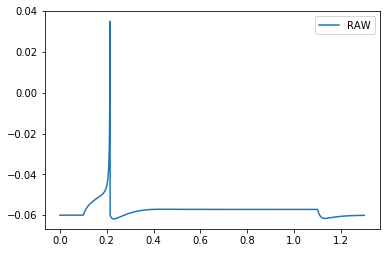

In [4]:


import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq

from neuronunit.optimization.data_transport_container import DataTC
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model.set_attrs(cells['TC'])

iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] =75.36800000000001*pq.pA
#['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)

model.inject_square_current(iparams)

plt.plot(model.get_membrane_potential().times,model.get_membrane_potential(),label='RAW')
plt.legend()
plt.show()


In [5]:

cnt = 0
scores = []
tests_,all_tests, observation,suite = opt.get_neab.get_tests()


In [6]:



def format_iparams(all_tests,rheobase):

    for t in all_tests[1:5]:
        DURATION = 500.0*pq.ms
        DELAY = 200.0*pq.ms

        obs = t.observation
        t.params = {}
        t.params['injected_square_current'] = {}
        t.params['injected_square_current']['delay']= DELAY
        t.params['injected_square_current']['duration'] = DURATION
        t.params['injected_square_current']['amplitude'] = -10*pq.pA
        
        
    for t in all_tests[-3::]:    
        t.params = {}
        DURATION = 1000.0*pq.ms
        DELAY = 100.0*pq.ms

        t.params['injected_square_current'] = {}
        t.params['injected_square_current']['delay']= DELAY
        t.params['injected_square_current']['duration'] = DURATION
        t.params['injected_square_current']['amplitude'] = rheobase['value']
    
    all_tests[0].params = all_tests[-1].params
    
    return all_tests

pt = format_iparams(all_tests,rheobase)
print([t.params['injected_square_current']['amplitude'] for t in pt[-3::] ])
print([t.params['injected_square_current']['amplitude'] for t in pt[0:5] ])



[array(75.53061224489795) * pA, array(75.53061224489795) * pA, array(75.53061224489795) * pA]
[array(75.53061224489795) * pA, array(-10.0) * pA, array(-10.0) * pA, array(-10.0) * pA, array(-10.0) * pA]


##
# * Get predictions from models.
## * Fake NeuroElectro Observations
## * Do roundtrip testing
##

In [7]:
predictions = []
import dask.bag as db
# The rheobase has been obtained seperately and cannot be db mapped.
# Nested DB mappings dont work.
ptbag = db.from_sequence(pt[1::])

def obtain_predictions(t):    
    model = None
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(cells['TC'])
    return t.generate_prediction(model)
predictions = list(ptbag.map(obtain_predictions).compute())
predictions.insert(0,rheobase)
print(predictions)    


injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
[{'value': array(75.53061224489795) * pA}, {'value': array(31739282.99824782) * kg*m**2/(s**3*A**2)}, {'value': array(0.0034631849083750876) * s}, {'value': array(1.0911352057216523e-10) * s**4*A**2/(kg*m**2)}, {'std': array(0.00019622743842309925) * V, 'mean': array(-0.060317405613048956) * V}, {'std': array(0.0) * s, 'mean': array(0.0006500000000000001) * s, 'n': 1}, {'std': array(0.0) * V, 'mean': array(0.056127191359642024) * V, 'n': 1}, {'std': array(0.0) * V, 'mean': array(-0.02112719135964202) * V, 'n': 1}]


In [8]:
# having both means and values in dictionary makes it very irritating to iterate over.
# It's more harmless to demote means to values, than to elevate values to means.
# Simply swap key names: means, for values.
for p in predictions:
    if 'mean' in p.keys():
        p['value'] = p.pop('mean')
print(predictions)


[{'value': array(75.53061224489795) * pA}, {'value': array(31739282.99824782) * kg*m**2/(s**3*A**2)}, {'value': array(0.0034631849083750876) * s}, {'value': array(1.0911352057216523e-10) * s**4*A**2/(kg*m**2)}, {'std': array(0.00019622743842309925) * V, 'value': array(-0.060317405613048956) * V}, {'std': array(0.0) * s, 'n': 1, 'value': array(0.0006500000000000001) * s}, {'std': array(0.0) * V, 'n': 1, 'value': array(0.056127191359642024) * V}, {'std': array(0.0) * V, 'n': 1, 'value': array(-0.02112719135964202) * V}]


In [9]:
# make some new tests based on internally generated data 
# as opposed to experimental data.


TC_tests = copy.copy(all_tests)
for ind,t in enumerate(TC_tests):
    if 'mean' in t.observation.keys():
        t.observation['value'] = t.observation.pop('mean')
    pred =  predictions[ind]['value']
    try:
        pred = pred.rescale(t.units)
        t.observation['value'] = pred
    except:        
        t.observation['value'] = pred
    t.observation['mean'] = t.observation['value']
        
    print(t.observation['value'])
    
pickle.dump(TC_tests,open('thalamo_cortical_tests.p','wb'))    
    




75.53061224489795 pA
31.73928299824782 Mohm
3.4631849083750876 ms
1.0911352057216523e-10 s**4*A**2/(kg*m**2)
-60.317405613048955 mV
0.6500000000000001 ms
56.127191359642026 mV
-21.127191359642023 mV


In [10]:
from neuronunit.optimization import optimization_management as om
free_params = ['a','b','vr'] # this can only be odd numbers.

#,'k','vthresh']
hc = {}
for k,v in cells['TC'].items():
    if k not in free_params:
        hc[k] = v
print(hc)
import pickle
TC_tests = pickle.load(open('thalamo_cortical_tests.p','rb'))    
                #run_ga(model_params, max_ngen, test, free_params = None, hc = None)
ga_out, DO = om.run_ga(explore_param,5,TC_tests,free_params=free_params,hc = hc)

{'vPeak': 35, 'd': 10, 'c': -60, 'k': 1.6, 'C': 200, 'vt': -50}
not even to test runner getting


/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4da20>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4de48>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4d160>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4db70>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4d978>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4dac8>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4d0f0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b4dc50>]
Try 1: SubMax = 208.5; SupraMin = 250.0
Try 2: SubMax = 226.3; SupraMin = 232.2
Try 3: SubMax = 226.3; SupraMin = 227.1
Try 1: SubMax = 1.0; SupraMin = 42.5
Try 2: SubMax = 1.0; SupraMin = 6.9
Try 3: SubMax = 6.1; SupraMin = 6.9
Try 1: SubMax = 250.0; SupraMin = None
Try 2: SubMax = 285.7; SupraMin = 321.4
Try 3: SubMax = 316

INFO:__main__:gen	nevals	avg    	std     	min    	max    
1  	8     	3.27818	0.690441	2.11234	4.51852
2  	8     	3.2836 	0.745438	2.3288 	4.30823


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a7f0da0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175cd85c50>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b5fc88>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f1759b5ff28>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a7608d0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a60b748>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a60b080>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175d3f1438>]
tests, completed, now gene computations
gets here??????
[[0.01, -0.41160272069523351, -56.247669134097492], [0.01, -2, -73.752330865902508], [0.01, 13.919119365130545, -75], [0.011765562374505122, 15, -55], [0.20000000000000001, -2, -75], [0.15693087857827179, -1.2118742936905633, -55], [0.18228274808717254, 15, -75], [0.2000

INFO:__main__:3  	8     	3.16408	0.789523	1.89947	4.39999


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7f177c4bc208>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a76d860>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f177c4d0358>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a76d128>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175cafec88>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175cb1cb00>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f175a6edf98>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7f177c4bcb00>]
tests, completed, now gene computations
gets here??????
[[0.01, 13.470213698349099, -74.780814075514783], [0.01, 15, -55.21918592448521], [0.01, -2, -74.942224006462808], [0.20000000000000001, -2.0, -55], [0.18126740686172746, 15, -75.0], [0.19254914595724559, 10.881190345443809, -55.310596516499004], [0.19871706707383346, -1

In [21]:
print(ga_out['dhof'][0].attrs)
cells['TC']

{'b': 15, 'vr': -55.21918592448521, 'a': 0.01}


{'C': 200,
 'a': 0.01,
 'b': 15,
 'c': -60,
 'd': 10,
 'k': 1.6,
 'vPeak': 35,
 'vr': -60,
 'vt': -50}

In [12]:
def hack_judge(test_and_models):
    (test, attrs) = test_and_models
    model = None
    obs = test.observation
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(attrs)
    test.generate_prediction(model)
    pred = test.generate_prediction(model)
    score = test.compute_score(obs,pred)
    try:
        print(obs['value'],pred['value'])
    except:
        print(obs['mean'],pred['mean'])
        
    return score

scores = []
for i,t in enumerate(TC_tests):
    test_and_models = (t,cells['TC'])
    score = hack_judge(test_and_models)
    scores.append(score)
print(scores[0].sort_key)    
print(scores[0])    



Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 72.1; SupraMin = 78.1
Try 3: SubMax = 74.7; SupraMin = 75.5
Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 72.1; SupraMin = 78.1
Try 3: SubMax = 74.7; SupraMin = 75.5
75.53061224489795 pA 75.53061224489795 pA
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
input resistance score: Z = 0.00
31.73928299824782 Mohm 31739282.99824782 kg*m**2/(s**3*A**2)
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
3.4631849083750876 ms 0.0034631849083750876 s
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected c

In [13]:
print([s.sort_key for s in scores])
print([s.score for s in scores])

score = hack_judge((TC_tests[-3],cells['TC']))
print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999996]
[0.0, 0.0, 0.0, 0.0, 0.0, -2.029026769368064e-16, 0.0, 6.317017647578838e-16]
0.6500000000000001 ms 0.0006500000000000001 s
Z = -0.00


In [14]:
scores = []
for t in TC_tests:
    test_and_models = (t,cells['RS'])
    score = hack_judge(test_and_models)
    scores.append(score)
print(scores[0].sort_key)    
print(scores[0])
print([s.sort_key for s in scores])


Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 48.4; SupraMin = 54.4
Try 3: SubMax = 51.0; SupraMin = 51.8
Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 48.4; SupraMin = 54.4
Try 3: SubMax = 51.0; SupraMin = 51.8
75.53061224489795 pA 51.81632653061225 pA
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
input resistance score: Z = 0.62
31.73928299824782 Mohm 79634016.52239381 kg*m**2/(s**3*A**2)
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
3.4631849083750876 ms 0.009810667396493434 s
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected cu

In [15]:
import dask.bag as db
# The rheobase has been obtained seperately and cannot be db mapped.
# Nested DB mappings dont work.
from itertools import repeat
test_a_models = zip(TC_tests[1::],repeat(cells['RS']))
tc_bag = db.from_sequence(test_a_models)

scores = list(tc_bag.map(hack_judge).compute())
scores.insert(0,rheobase)
print(scores)    

injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
injected current seen:  {'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms}
input resistance score: Z = 0.62
31.73928299824782 Mohm 79634016.52239381 kg*m**2/(s**3*A**2)
3.4631849083750876 ms 0.009810667396493434 s
1.0911352057216523e-10 s**4*A**2/(kg*m**2) 1.231969430266598e-10 s**4*A**2/(kg*m**2)
-21.127191359642023 mV -0.018576602637434048 V
0.6500000000000001 ms 0.000775000

In [16]:
score = TC_tests[0].judge(model,stop_on_error = False, deep_error = True)
print(score.prediction)
#print(model.get_spike_count())

Try 1: SubMax = 42.5; SupraMin = 84.0
Try 2: SubMax = 72.1; SupraMin = 78.1
Try 3: SubMax = 74.7; SupraMin = 75.5
{'value': array(75.53061224489795) * pA}


In [17]:
from neuronunit.optimization import optimization_management as opt
from neuronunit.models import ReducedModel

ImportError: cannot import name 'ReducedModel'